In [1]:
import torch.nn as nn
import torch.nn.functional as F

class FCN_TSC(nn.Module):
    def __init__(self, i_nc, n_classes):
        super(FCN_TSC, self).__init__()
        
        self.conv1 = nn.Conv1d(i_nc, 128, kernel_size=7, padding=3, stride=1, bias=False)

        self.conv2 = nn.Conv1d(128, 256, kernel_size=5, padding=2, stride=1, bias=False)

        self.conv3 = nn.Conv1d(256, 128, kernel_size=3, padding=1, stride=1, bias=False)
        
        self.final = nn.Linear(128, n_classes)

    def forward(self, x): 
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.conv3(x)
        x = F.adaptive_avg_pool1d(x,1)
        x = x.view(x.size(0), -1)
        logits = self.final(x)

        return logits


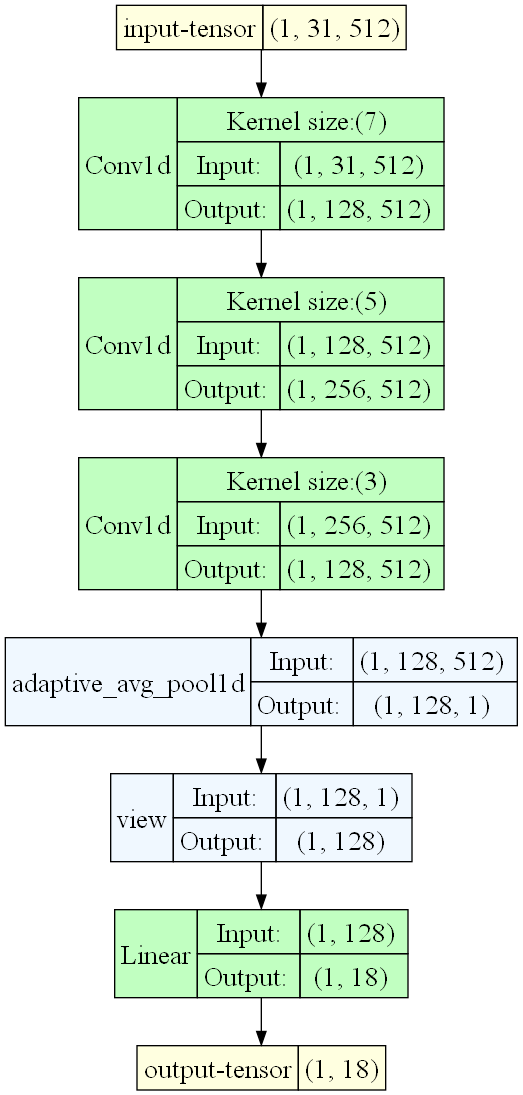

In [2]:
from utils import data_info
# import os
# os.environ["PATH"]+=os.pathsep+'C:\\Program Files\\Graphviz\\bin'
import graphviz
graphviz.set_jupyter_format('png')

#dataset = "UCI_HAR"
#dataset = "UniMiB-SHAR"
#dataset = "OPPORTUNITY"
dataset = "PAMAP2"
#dataset = "DSADS"
#dataset = "KU-HAR"
#dataset = "REALDISP"


input_nc, segment_size, class_num = data_info(dataset)

net = FCN_TSC(input_nc, class_num)

from torchview import draw_graph

model_graph = draw_graph(net, input_size=(1, input_nc, segment_size), save_graph=True, filename="T-FCN", expand_nested=False)
model_graph.visual_graph